In [40]:
import os
import re
import sys
import glob
import copy
import time
import random
import datetime
import argparse
import subprocess
import numpy as np
import pandas as pd
import itertools as it
import multiprocessing

import numpy as np
import pysam
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
%matplotlib inline

In [41]:
# declarations
base_dir_data = "data/"
base_dir_out = "data/gtex_aggs/"
out_dir = "analysis_21042020/"
fig_dir = "analysis_21042020/figs/"

readlen = 101
num_tissues = 3
num_samples = 10

gff3cols=["seqid","source","type","start","end","score","strand","phase","attributes"]

Text(0, 0.5, '% Sample TPM')

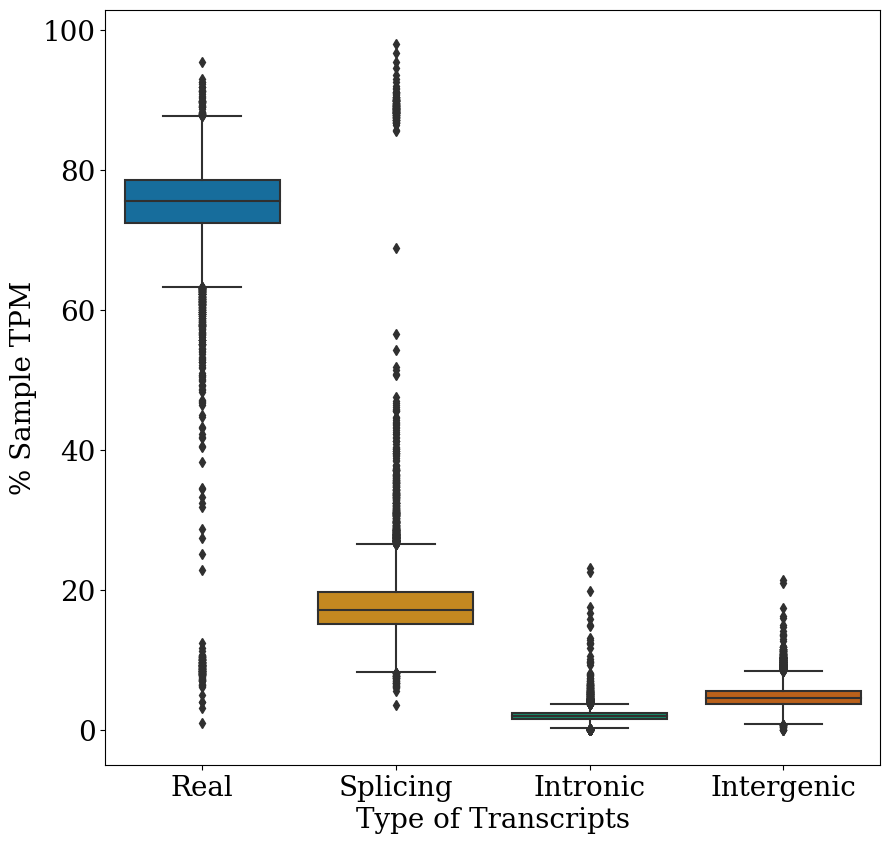

In [42]:
stats_loc5 = pd.read_csv(base_dir_out+"res.num_tx_per_sample_loc5")
df = stats_loc5[["sample","total_tpm_real","total_tpm_splicing","total_tpm_intronic","total_tpm_intergenic"]]
sum_df = df.groupby(by="sample").sum()
sum_df.reset_index(inplace=True)

sum_df["total_tpm"] = sum_df["total_tpm_real"]+\
                      sum_df["total_tpm_splicing"]+\
                      sum_df["total_tpm_intronic"]+\
                      sum_df["total_tpm_intergenic"]

# compute percentage of TPM from each type of noise
sum_df["total_noise"] = sum_df["total_tpm_splicing"]+\
                        sum_df["total_tpm_intronic"]+\
                        sum_df["total_tpm_intergenic"]

sum_df["perc_noise"] = (sum_df["total_noise"]/sum_df["total_tpm"])*100
sum_df["perc_real"] = (sum_df["total_tpm_real"]/sum_df["total_tpm"])*100
sum_df["perc_splicing"] = (sum_df["total_tpm_splicing"]/sum_df["total_tpm"])*100
sum_df["perc_intronic"] = (sum_df["total_tpm_intronic"]/sum_df["total_tpm"])*100
sum_df["perc_intergenic"] = (sum_df["total_tpm_intergenic"]/sum_df["total_tpm"])*100

res = pd.DataFrame()

tmp = sum_df[["perc_noise"]].reset_index(drop=True)
tmp.columns = ["perc"]
tmp["type"] = "Total Noise"
res = pd.concat([res,tmp],axis=0).reset_index(drop=True)

tmp = sum_df[["perc_real"]].reset_index(drop=True)
tmp.columns = ["perc"]
tmp["type"] = "Real"
res = pd.concat([res,tmp],axis=0).reset_index(drop=True)

tmp = sum_df[["perc_splicing"]].reset_index(drop=True)
tmp.columns = ["perc"]
tmp["type"] = "Splicing"
res = pd.concat([res,tmp],axis=0).reset_index(drop=True)

tmp = sum_df[["perc_intronic"]].reset_index(drop=True)
tmp.columns = ["perc"]
tmp["type"] = "Intronic"
res = pd.concat([res,tmp],axis=0).reset_index(drop=True)

tmp = sum_df[["perc_intergenic"]].reset_index(drop=True)
tmp.columns = ["perc"]
tmp["type"] = "Intergenic"
res = pd.concat([res,tmp],axis=0).reset_index(drop=True)

plt.figure(figsize=(10,10),dpi=100)
params = {'font.size': 20}
plt.rcParams.update(params)
sns.set_palette("colorblind")
sns.boxplot(x="type",y="perc",data=res,order=["Real","Splicing","Intronic","Intergenic"])
plt.xlabel("Type of Transcripts")
plt.ylabel("% Sample TPM")

[None, None, None, None, None, None, None, None]

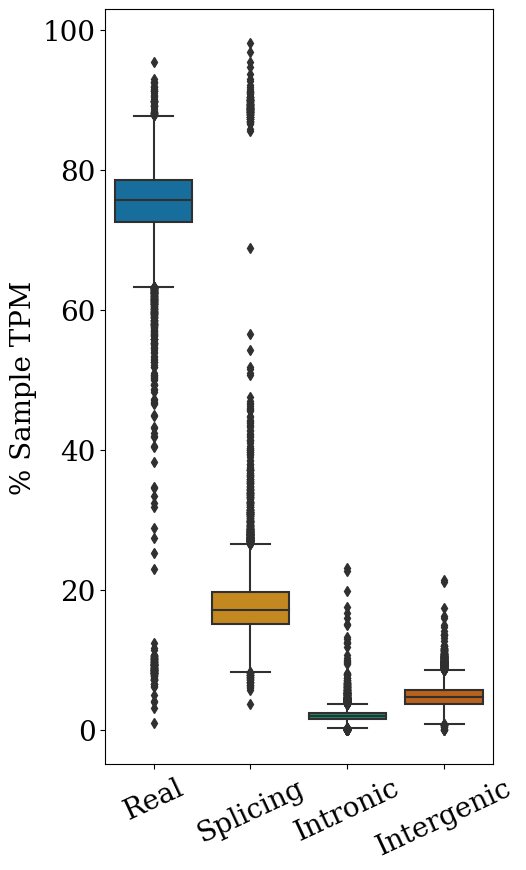

In [46]:
plt.figure(figsize=(5,10),dpi=100)
params = {'font.size': 20}
plt.rcParams.update(params)
sns.set_palette("colorblind")
sns.boxplot(x="type",y="perc",data=res,order=["Real","Splicing","Intronic","Intergenic"])
plt.xlabel("")
plt.ylabel("% Sample TPM")
plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=25)